In [1]:
import pickle
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [209]:
ms = ['Ideal', 'Unmitigated', 'ZNE', 'RF', 'MLP', 'GNN', 'OLS']
tmp = ['L2_ideal', 'L2_noisy', 'L2_zne', 'L2_rfr_list', 'L2_mlp', 'L2_gnn', 'L2_ols_full']
cols2ms = {t: ms[i] for i, t in enumerate(tmp)}
color_ind = [2, 0, 1, 3, 4, 5, 6]
colors = {x: sns.color_palette()[ind] for _, (ind, x) in enumerate(zip(color_ind, ms))}

In [198]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [210]:
cols2ms

{'L2_ideal': 'Ideal',
 'L2_noisy': 'Unmitigated',
 'L2_zne': 'ZNE',
 'L2_rfr_list': 'RF',
 'L2_mlp': 'MLP',
 'L2_gnn': 'GNN',
 'L2_ols_full': 'OLS'}

# Ising, incoherent noise

In [68]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/incoherent_single_ising.pk', 'rb') as file:
    loaded = pickle.load(file)

exp_Z_all_ideal_incoherent = loaded['exp_Z_all_ideal']
exp_Z_all_noisy_incoherent = loaded['exp_Z_all_noisy']
exp_Z_all_mitigated_dict_incoherent = loaded['exp_Z_all_mitigated_dict']
models_incoherent = loaded['models']

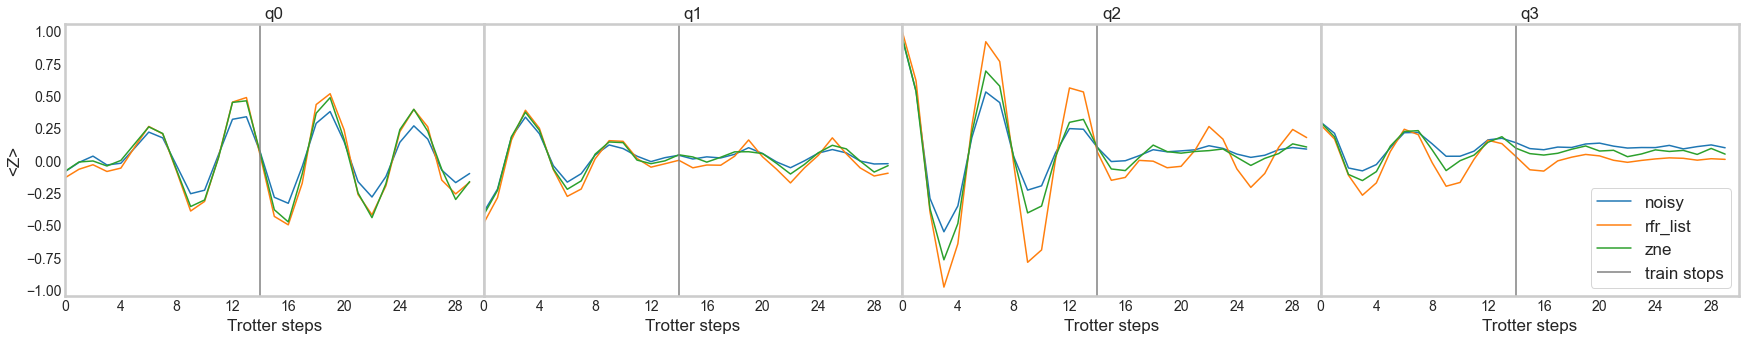

In [69]:
import matplotlib as mpl
ms, fs, lw, elw, cs = 9, 17, 2.5, 2, 0
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', weight='normal')

fig = plt.figure(figsize=(30, 5))
ax = [fig.add_subplot(1,4,i+1) for i in range(4)]
plt.style.use({'figure.facecolor':'white'})

for q in range(4):
    # ax[q].plot(-exp_Z_all_ideal_incoherent[:, q], label='ideal')
    ax[q].plot(-exp_Z_all_noisy_incoherent[:, q], label='noisy')
    for key, val in exp_Z_all_mitigated_dict_incoherent.items():
        if models_incoherent[key] in [
            # 'gnn',
            # 'mlp',
            # 'ols_full',
            'rfr_list',
            'zne'
        ]:
            ax[q].plot(-val[:, q], label=f'{models_incoherent[key]}')
    ax[q].vlines(x=14, ymin=-2, ymax=2, color='gray', label = 'train stops')
    ax[q].grid(False)

for a in ax[1:]:
    a.set_yticklabels([])
for a in ax:
    a.tick_params(direction="in")
    a.set_ylim([-1.05, 1.05])
    a.set_xlim([0, 30])
    a.set_xlabel('Trotter steps', fontsize=fs)
    a.set_xticks(np.arange(0, 29, 4))
for a in ax:
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(2.6)

for q in range(4):
    ax[q].set_title(f'q{q}', fontsize=fs)
plt.subplots_adjust(wspace=0, hspace=0)
plt.legend(loc='lower right', fontsize=fs)
ax[0].set_ylabel(f'<Z>', fontsize=fs)
plt.show()

# Ising, coherent noise

In [70]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/coherent_single_ising.pk', 'rb') as file:
    loaded = pickle.load(file)

exp_Z_all_ideal_coherent = loaded['exp_Z_all_ideal']
exp_Z_all_noisy_coherent = loaded['exp_Z_all_noisy']
exp_Z_all_mitigated_dict_coherent = loaded['exp_Z_all_mitigated_dict']
models_coherent = loaded['models']

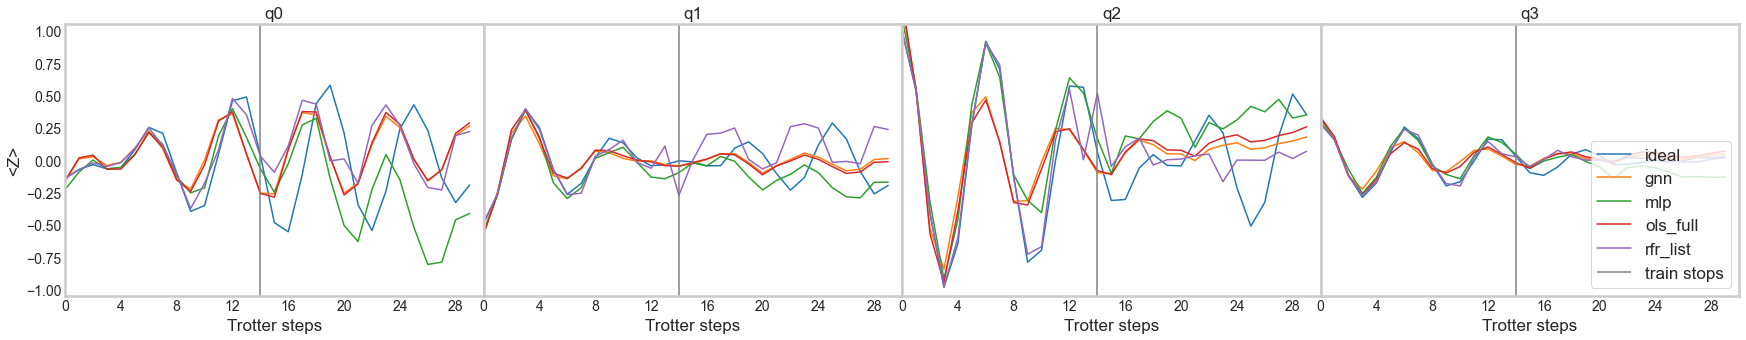

In [71]:
import matplotlib as mpl
ms, fs, lw, elw, cs = 9, 17, 2.5, 2, 0
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', weight='normal')

fig = plt.figure(figsize=(30, 5))
ax = [fig.add_subplot(1,4,i+1) for i in range(4)]
plt.style.use({'figure.facecolor':'white'})

for q in range(4):
    ax[q].plot(-exp_Z_all_ideal_coherent[:, q], label='ideal')
    # ax[q].plot(-exp_Z_all_noisy_coherent[:, q], label='noisy')
    for key, val in exp_Z_all_mitigated_dict_coherent.items():
        if models_coherent[key] in [
            'gnn',
            'mlp',
            'ols_full',
            'rfr_list',
            # 'zne'
        ]:
            ax[q].plot(-val[:, q], label=f'{models_coherent[key]}')
    ax[q].vlines(x=14, ymin=-2, ymax=2, color='gray', label = 'train stops')
    ax[q].grid(False)

for a in ax[1:]:
    a.set_yticklabels([])
for a in ax:
    a.tick_params(direction="in")
    a.set_ylim([-1.05, 1.05])
    a.set_xlim([0, 30])
    a.set_xlabel('Trotter steps', fontsize=fs)
    a.set_xticks(np.arange(0, 29, 4))
for a in ax:
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(2.6)

for q in range(4):
    ax[q].set_title(f'q{q}', fontsize=fs)
plt.subplots_adjust(wspace=0, hspace=0)
plt.legend(loc='lower right', fontsize=fs)
ax[0].set_ylabel(f'<Z>', fontsize=fs)
plt.show()

# Ising, incoherent noise

In [72]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/incoherent_over_depths.pk', 'rb') as file:
    loaded = pickle.load(file)
df_mean_incoherent = loaded['df_mean']
df_ste_incoherent = loaded['df_ste']
df_incoherent = loaded['df']

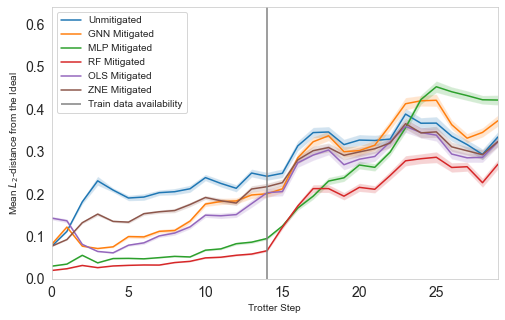

In [73]:
plt.style.use({'figure.facecolor':'white'})
plt.figure(figsize=(8, 5))
steps = sorted(set(df_incoherent.step))
legend_labels = ['Unmitigated', 'GNN Mitigated', 'MLP Mitigated', 'RF Mitigated', 'OLS Mitigated', 'ZNE Mitigated']
for i, col in enumerate(['L2_noisy', 'L2_gnn', 'L2_mlp', 'L2_rfr_list', 'L2_ols_full', 'L2_zne']):
    plt.plot(steps, df_mean_incoherent[col], label=legend_labels[i])
    plt.fill_between(x=steps, y1=df_mean_incoherent[col]-df_ste_incoherent[col], y2=df_mean_incoherent[col]+df_ste_incoherent[col], alpha=0.2)
plt.xlabel('Trotter Step')
plt.ylabel(r'Mean $L_2$-distance from the Ideal')
plt.ylim([0, 0.64])
plt.xlim([0, 29])
plt.vlines(x=14, ymin=0, ymax=1, color='gray', label='Train data availability')
plt.legend()
plt.grid(None)
plt.show()

# Ising, coherent

In [74]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/coherent_over_depths.pk', 'rb') as file:
    loaded = pickle.load(file)
df_mean_coherent = loaded['df_mean']
df_ste_coherent = loaded['df_ste']
df_coherent = loaded['df']

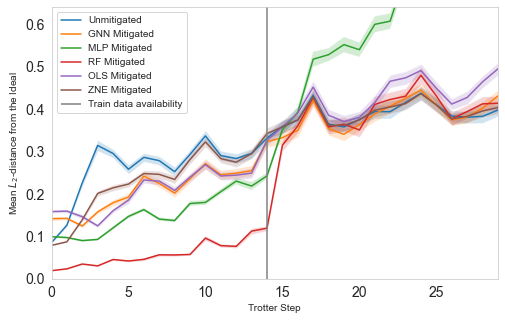

In [75]:
plt.style.use({'figure.facecolor':'white'})
plt.figure(figsize=(8, 5))
steps = sorted(set(df_coherent.step))
legend_labels = ['Unmitigated', 'GNN Mitigated', 'MLP Mitigated', 'RF Mitigated', 'OLS Mitigated', 'ZNE Mitigated']
for i, col in enumerate(['L2_noisy', 'L2_gnn', 'L2_mlp', 'L2_rfr_list', 'L2_ols_full', 'L2_zne']):
    plt.plot(steps, df_mean_coherent[col], label=legend_labels[i])
    plt.fill_between(x=steps, y1=df_mean_coherent[col]-df_ste_coherent[col], y2=df_mean_coherent[col]+df_ste_coherent[col], alpha=0.2)
plt.xlabel('Trotter Step')
plt.ylabel(r'Mean $L_2$-distance from the Ideal')
plt.ylim([0, 0.64])
plt.xlim([0, 29])
plt.vlines(x=14, ymin=0, ymax=1, color='gray', label='Train data availability')
plt.legend()
plt.grid(None)
plt.show()

# The big plot

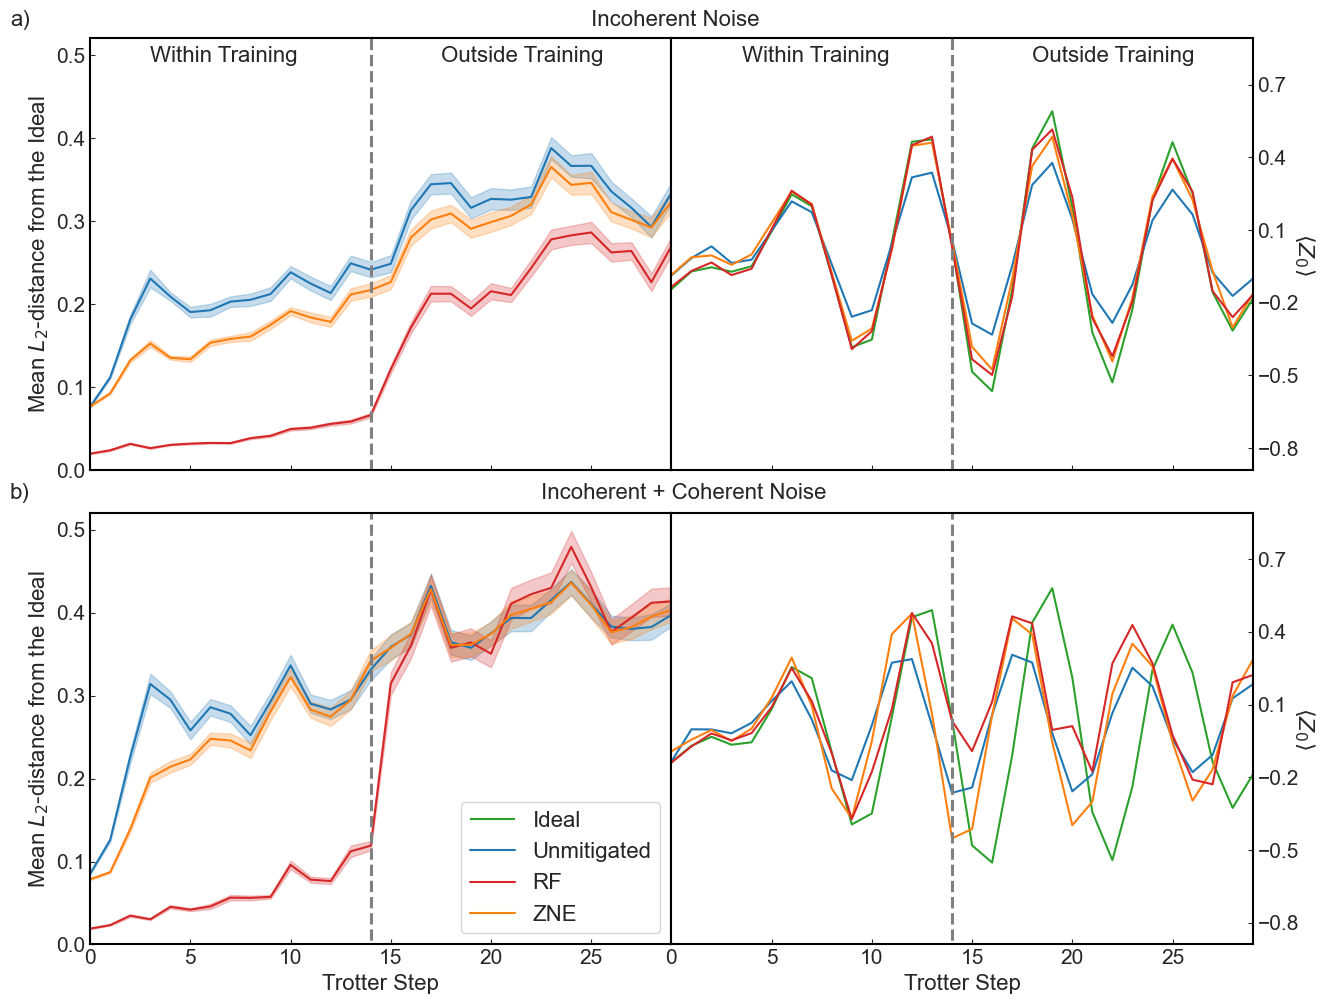

In [329]:
import matplotlib as mpl
ms, fs, lw, elw, cs = 9, 16, 2.5, 2, 0
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rc('font', weight='normal')

fig = plt.figure(figsize=(15, 12), dpi=100)
ax = [fig.add_subplot(2,2,i+1) for i in range(4)]
plt.style.use({'figure.facecolor':'white'})

###################################################
steps = sorted(set(df_incoherent.step))
legend_labels = ['Unmitigated', 'RF', 'ZNE']#['Unmitigated', 'GNN', 'MLP', 'RF', 'OLS', 'ZNE']
cols = ['L2_noisy', 'L2_rfr_list', 'L2_zne']#['L2_noisy', 'L2_gnn', 'L2_mlp', 'L2_rfr_list', 'L2_ols_full', 'L2_zne']
a = 0.3
alphas = [1]*3 #[1, a, a, 1, a, 1]

for i, col in enumerate(cols):
    ax[0].plot(steps, df_mean_incoherent[col], label=legend_labels[i], color=colors[legend_labels[i]], alpha=alphas[i])
    ax[0].fill_between(x=steps, y1=df_mean_incoherent[col]-df_ste_incoherent[col], y2=df_mean_incoherent[col]+df_ste_incoherent[col], alpha=alphas[i]/4, color=colors[legend_labels[i]])

#################################################
q = 0
ax[1].plot(-exp_Z_all_ideal_incoherent[:, q], label='ideal', color=colors['Ideal'])
ax[1].plot(-exp_Z_all_noisy_incoherent[:, q], label='Unmitigated', color=colors['Unmitigated'])
for key, val in exp_Z_all_mitigated_dict_incoherent.items():
    if models_incoherent[key] in ['zne']:
        ax[1].plot(-val[:, q], label='ZNE', color=colors['ZNE'])
for key, val in exp_Z_all_mitigated_dict_incoherent.items():
    if models_incoherent[key] in ['rfr_list']:
        ax[1].plot(-val[:, q], label='RF', color=colors['RF'])

###################################################
ax[2].hlines(-100, 0, 1, label='Ideal', color=colors['Ideal'])
steps = sorted(set(df_incoherent.step))
for i, col in enumerate(cols):
    ax[2].plot(steps, df_mean_coherent[col], label=legend_labels[i], color=colors[legend_labels[i]], alpha=alphas[i])
    ax[2].fill_between(x=steps, y1=df_mean_coherent[col]-df_ste_coherent[col], y2=df_mean_coherent[col]+df_ste_coherent[col], alpha=alphas[i]/4, color=colors[legend_labels[i]])

#################################################
q = 0
ax[3].plot(-exp_Z_all_ideal_coherent[:, q], label='ideal', color=colors['Ideal'])
ax[3].plot(-exp_Z_all_noisy_coherent[:, q], label='Unmitigated', color=colors['Unmitigated'])
for key, val in exp_Z_all_mitigated_dict_coherent.items():
    if models_coherent[key] in ['zne']:
        ax[3].plot(-val[:, q], label='ZNE', color=colors['ZNE'])
for key, val in exp_Z_all_mitigated_dict_coherent.items():
    if models_coherent[key] in ['rfr_list']:
        ax[3].plot(-val[:, q], label='RF', color=colors['RF'])


##############################################
for i in [2, 3]:
    ax[i].set_xlabel('Trotter Step', fontsize=fs)

for i in [0, 2]:
    ax[i].yaxis.set_tick_params(
        which='both',      # both major and minor ticks are affected
        left=True,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        direction='in')
    ax[i].set_ylabel(r'Mean $L_2$-distance from the Ideal', fontsize=fs)
    ax[i].set_xlim([0, 29])
    ax[i].set_ylim([0, 0.52])

for i in [1, 3]:
    ax[i].yaxis.set_tick_params(
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        right=True,         # ticks along the top edge are off
        direction='in')
    ax[i].set_xlim([0, 29])
    ax[i].set_ylim([-0.89, 0.89])
    ymin, ymax = ax[i].get_ylim()
    ax[i].set_yticks(np.arange(-0.8, 0.9, 0.3))
    ax[i].set_ylabel(r'$\langle Z_0 \rangle$', fontsize=fs, rotation=-90, labelpad=13)
    ax[i].yaxis.tick_right()
    ax[i].yaxis.set_label_position("right")

for i in [0, 1]:
    ax[i].set_xlabel(None)
    ax[i].set_xticklabels([])

ax[2].legend(fontsize=fs, loc='lower right')

for a in ax:
    a.vlines(x=14, ymin=-100, ymax=100, color='gray', linestyles='dashed', linewidth=2.2)
    a.xaxis.set_tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True, # labels along the bottom edge are off
    direction='in')
    a.grid(None)
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(1.5)
        a.spines[axis].set_color('black')

plt.text(-4, 2.9, 'Incoherent Noise', fontsize=fs)
plt.text(-6.5, 0.95, 'Incoherent + Coherent Noise', fontsize=fs)
plt.text(-26, 2.75, 'Within Training', fontsize=fs)
plt.text(-11.5, 2.75, 'Outside Training', fontsize=fs)
plt.text(3.5, 2.75, 'Within Training', fontsize=fs)
plt.text(18, 2.75, 'Outside Training', fontsize=fs)

plt.text(-33, 2.9, 'a)', fontsize=fs)#, weight='bold')
plt.text(-33, 0.95, 'b)', fontsize=fs)#, weight='bold')

plt.subplots_adjust(hspace=0.1, wspace=0)
plt.savefig("/Users/haoranliao/GitHub/blackwater/docs/paper_figures/fig4_ising.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# Tomography

In [22]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/tomograhy.pk', 'rb') as file:
    loaded = pickle.load(file)
df2 = loaded['df2']

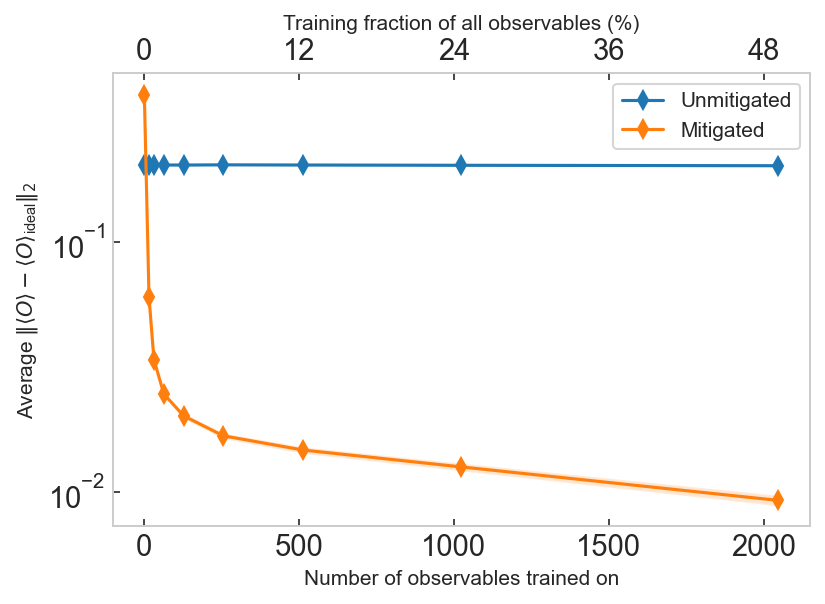

In [23]:
fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

x = df2.index

y = df2['dist_l2_noisy_0']['mean']
ax1.plot(x, y, label='Unmitigated', marker='d')
ax1.fill_between(x,
                 y-df2['dist_l2_noisy_0']['std']/np.sqrt(4**6 - x),
                 y+df2['dist_l2_noisy_0']['std']/np.sqrt(4**6 - x),
                 alpha=0.2)

y = df2['dist_l2_mitigated_0']['mean']
ax1.plot(x, y, label='Mitigated', marker='d')
ax1.fill_between(x,
                 y-df2['dist_l2_mitigated_0']['std']/np.sqrt(4**6 - x), y+df2['dist_l2_mitigated_0']['std']/np.sqrt(4**6 - x),
                 alpha=0.2)

ax1.set_yscale('log')
# plt.xscale('log')

ax2.set_xlim(ax1.get_xlim())
ax2.set_navigate(False)
import matplotlib.ticker as mticks
ticks = ax1.get_xticks()
ax2.xaxis.set_major_locator(mticks.FixedLocator(ticks))
percent = [int(x) for x in np.array(ticks)/4**6 * 100]
ax2.set_xticklabels([str(x) for x in percent])
ax2.set_xlabel(r"Training fraction of all observables (%)")

ax1.set_ylabel(r'Average $\|\langle O\rangle-\langle O\rangle _{\mathregular{ideal}} \|_2$')
ax1.set_xlabel('Number of observables trained on')
ax1.legend()

plt.style.use({'figure.facecolor':'white'})
ax1.grid(False)
ax2.grid(False)
for tick in ax1.yaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
ax1.tick_params(axis='y',direction='in')
ax1.tick_params(axis='x',direction='in')
ax2.tick_params(axis='x',direction='in')
plt.show()

# Mimic ZNE

In [37]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/mimic_zne.pk', 'rb') as file:
    loaded = pickle.load(file)
df_pred = loaded['df_pred']

In [23]:
df_pred_mean = df_pred.groupby('steps').agg('mean', numeric_only=True)
df_pred_ste = df_pred.groupby('steps').agg('std', numeric_only=True) / np.sqrt(len(df_pred[df_pred['steps']==0]))

plt.style.use({'figure.facecolor':'white'})
plt.figure(figsize=(8, 5))
steps = sorted(set(df_pred.steps))
legend_labels = ['Unmitigated', 'ZNE Mitigated', 'Mimic ZNE']
for i, col in enumerate(['L2_noisy', 'L2_zne_mitigated', 'L2_tree_pred']):
    plt.plot(steps, df_pred_mean[col], label=legend_labels[i])
    plt.fill_between(x=steps, y1=df_pred_mean[col]-df_pred_ste[col], y2=df_pred_mean[col]+df_pred_ste[col], alpha=0.2)
plt.xlabel('Trotter Step')
plt.ylabel(r'Mean $L_2$-distance from the Ideal')
# plt.ylim([0, 0.64])
plt.xlim([0, 29])
plt.legend()
plt.grid(None)
plt.show()

NameError: name 'df_pred' is not defined

# Random Circuits

In [192]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/random_circuits.pk', 'rb') as file:
    loaded = pickle.load(file)
df = loaded['df']

In [211]:
colors_copy = {x: colors[cols2ms[x]] for i, x in enumerate(['L2_noisy', 'L2_zne', 'L2_ols_full', 'L2_rfr_list', 'L2_mlp', 'L2_gnn'])}

/var/folders/kj/mfqyg_tj77nf4gt67lvscdkw0000gn/T/ipykernel_16693/987547866.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(tmp)


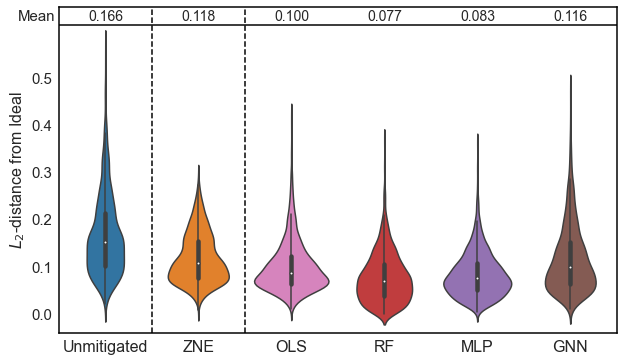

In [212]:
fs = 16
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rc('font', weight='normal')
plt.style.use({'figure.facecolor':'white'})
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[['L2_noisy', 'L2_zne', 'L2_ols_full', 'L2_rfr_list', 'L2_mlp', 'L2_gnn']], palette=colors_copy)
# labels = ax.get_xticklabels()
ax.set_xticklabels(['Unmitigated', 'ZNE', 'OLS', 'RF', 'MLP', 'GNN'], fontsize=fs)
plt.ylabel(r'$L_2$-distance from Ideal', fontsize=fs)
plt.ylim([-0.04, 0.65])
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
plt.ylim([ymin, ymax])
plt.xlim([xmin, xmax])
ax.grid(False)
plt.vlines(x=0.5, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed')
plt.vlines(x=1.5, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed')
plt.hlines(y=0.61, xmin=xmin, xmax=xmax, colors='black', linestyles='solid')

for a in [ax]:
    # a.set_yticks(np.arange(0, 0.7, 0.1))
    # a.tick_params(direction="in")
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(1.5)
        a.spines[axis].set_color('black')

for i, col in enumerate(['L2_noisy', 'L2_zne', 'L2_ols_full', 'L2_rfr_list', 'L2_mlp', 'L2_gnn']):
    plt.text(i-0.18, 0.62, '%.3f'%round(np.mean(df[col]), 3), fontsize=fs-2)

plt.text(-0.94, 0.62, 'Mean', fontsize=fs-1)
tmp = ax.yaxis.get_majorticklabels()
tmp[-2] = tmp[-2].set_text('2')
ax.set_yticklabels(tmp)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("/Users/haoranliao/GitHub/blackwater/docs/paper_figures/random_circuits.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()